In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


**Machine Learning Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn import svm



import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from matplotlib import pyplot

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


**Dataset**

In [ ]:
data = pd.read_csv("heart2.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1999, 18)

In [ ]:
data.head(9)

,target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No


In [ ]:
data.sample(5)

,target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
854,No,19.84,Yes,No,No,0,0,No,Female,55-59,White,Yes,No,Excellent,10,No,No,No
672,No,34.54,No,No,No,0,0,No,Female,60-64,Black,No,Yes,Very good,8,No,No,No
1980,No,27.44,No,No,No,0,0,No,Female,65-69,White,No,No,Very good,8,No,No,No
501,No,27.50,No,No,No,5,6,No,Male,18-24,White,No,Yes,Excellent,8,No,No,No
335,No,30.18,Yes,No,No,30,0,No,Female,55-59,White,Yes,Yes,Good,8,No,No,No


In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,29.223062,4.448224,3.825413,7.137569
std,6.497061,8.859214,7.997937,1.622102
min,12.480000,0.000000,0.000000,1.000000
25%,24.800000,0.000000,0.000000,6.000000
50%,28.250000,0.000000,0.000000,7.000000
75%,32.905000,3.000000,3.000000,8.000000
max,75.820000,30.000000,30.000000,18.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target            1999 non-null   object 
 1   BMI               1999 non-null   float64
 2   Smoking           1999 non-null   object 
 3   AlcoholDrinking   1999 non-null   object 
 4   Stroke            1999 non-null   object 
 5   PhysicalHealth    1999 non-null   int64  
 6   MentalHealth      1999 non-null   int64  
 7   DiffWalking       1999 non-null   object 
 8   Sex               1999 non-null   object 
 9   AgeCategory       1999 non-null   object 
 10  Race              1999 non-null   object 
 11  Diabetic          1999 non-null   object 
 12  PhysicalActivity  1999 non-null   object 
 13  GenHealth         1999 non-null   object 
 14  SleepTime         1999 non-null   int64  
 15  Asthma            1999 non-null   object 
 16  KidneyDisease     1999 non-null   object 


**Checking for any null values or duplicated rows**

In [ ]:
data.isnull().sum()

target              0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data = pd.read_csv('./heart2.csv')
distinct_count = len(data.drop_duplicates())
duplicate_count = len(data) - distinct_count
f'{distinct_count} distinct rows and {duplicate_count} duplicated rows'

'1999 distinct rows and 0 duplicated rows'

**How many target variable are there**

In [ ]:
data["target"].unique()

array(['No', 'Yes'], dtype=object)

**The number of people who have Heart Disease(1) and the ones who doesn't have Heart Disease**

In [ ]:



target_temp = data.target.value_counts()

print(target_temp)

No     1745
Yes     254
Name: target, dtype: int64


**AgeCategory shouldn't be categorical,a function to calculate the mean age and make it a continuous feature**

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

**Scatter plot**

(1999, 2) (1999,)
Counter({0: 1000, 1: 999})
[-0.67322472  4.62002377] 0
[-10.05130117  -3.693535  ] 1
[-0.84351622  3.7940829 ] 0
[-1.88832573  6.01985124] 0
[-11.52731048  -3.58058806] 1
[-9.61785722 -5.24089682] 1
[-8.91622658 -2.95256262] 1
[-1.6057775   3.94690804] 0
[-10.08805687  -4.4421194 ] 1
[-10.9105226   -2.81820716] 1


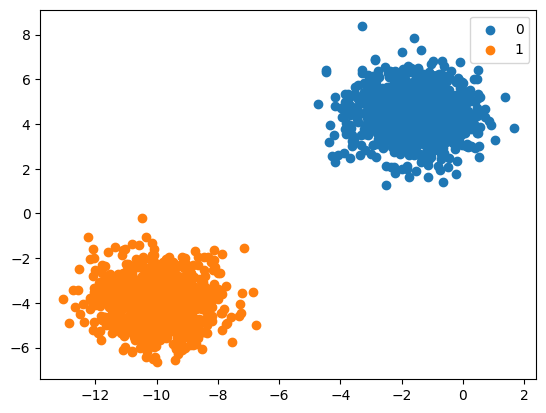

In [ ]:

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
X, y = make_blobs(n_samples=1999, centers=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
 print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Data Cleaning and Preprocessing**

In [ ]:
print('Continuous Columns')
data.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.480000,29.223062,75.820000
AgeCategory,21.000000,60.389695,80.000000


In [ ]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    data[col] = data[col]/data[col].max()

In [ ]:
print('\nCategorical Columns\n')
data.select_dtypes(include=['O']).nunique()


Categorical Columns



target              2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

Some categorical columns have 2 values, and some have more than 2 values. Here, I will convert the columns with 2 unique values to binary (either 1 or 0) And one-hot encode the other categorical columns which has more than 2 unique values bold **text**

In [ ]:
# Integer encode columns with 2 unique values
for col in ['target', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if data[col].dtype == 'O':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
# One-hot encode columns with more than 2 unique values
data = pd.get_dummies(data, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [ ]:
data.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,0.385427,0.085691,0.164600,0.327090,0.372593,0.433988,1.000000
PhysicalHealth,0.148274,0.295307,0.000000,0.000000,0.000000,0.100000,1.000000
MentalHealth,0.127514,0.266598,0.000000,0.000000,0.000000,0.100000,1.000000
AgeCategory,0.754871,0.205374,0.262500,0.650000,0.837500,0.900000,1.000000
SleepTime,0.396532,0.090117,0.055556,0.333333,0.388889,0.444444,1.000000


In [ ]:
print('Continuous Columns')
data.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,0.164600,0.385427,1.000000
PhysicalHealth,0.000000,0.148274,1.000000
MentalHealth,0.000000,0.127514,1.000000
AgeCategory,0.262500,0.754871,1.000000
SleepTime,0.055556,0.396532,1.000000


In [ ]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    data[col] = data[col]/data[col].max()

In [ ]:
print('\nCategorical Columns\n')
data.select_dtypes(include=['O']).nunique()


Categorical Columns



Series([], dtype: float64)

**Correlation matrix**

In [ ]:
fig = px.imshow(data[['target', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

In [ ]:
class_dist=data['target'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *target_temp[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *target_temp[1] / (class_dist[0]+class_dist[1])))

0    1745
1     254
Name: target, dtype: int64

Class 0: 87.29%
Class 1: 12.71%


**Data Splitting for training and testing**

In [ ]:
features = data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]

labels = data['target']

In [ ]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1599
No. of testing examples: 400


In [ ]:
print('\nData in Training:')
print(training_data['target'].value_counts())

print('\nData in Testing:')
print(testing_data['target'].value_counts())


Data in Training:
0    1397
1     202
Name: target, dtype: int64

Data in Testing:
0    348
1     52
Name: target, dtype: int64


**Training and evaluation of model**

In [ ]:
x_train = np.array(training_data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_train = np.array(training_data['target'])

x_test = np.array(testing_data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_test = np.array(testing_data['target'])

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state = 100) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 

**Logistic Regression**

Accuracy  0.81
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       348
           1       0.35      0.52      0.42        52

    accuracy                           0.81       400
   macro avg       0.63      0.69      0.65       400
weighted avg       0.85      0.81      0.83       400

Accuracy   : 0.81
Precision : 0.34615384615384615
Recall    : 0.5192307692307693
F1-score  : 0.41538461538461535


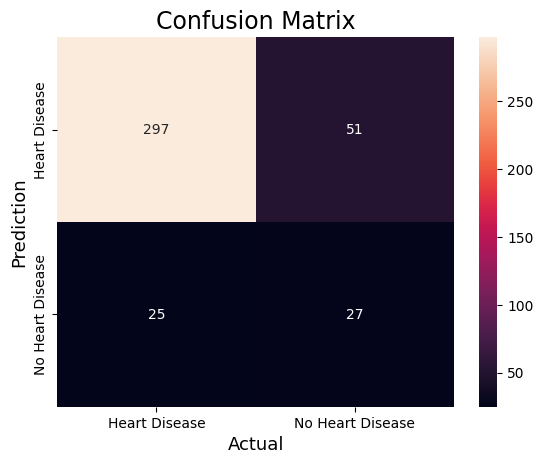

Logistic Regression: ROC AUC=0.750


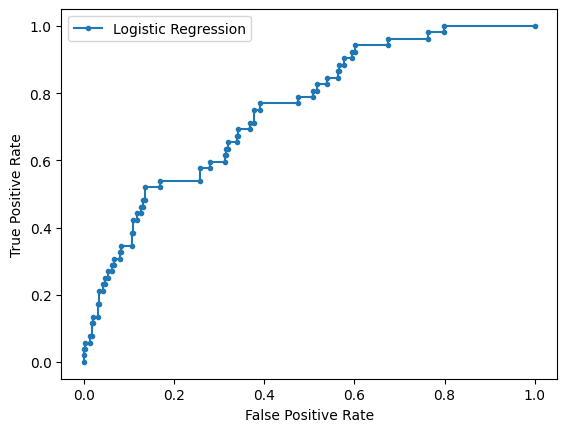

In [ ]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 




lr_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", lr_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()





from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


**Random Forest**

Accuracy  0.8525
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       348
           1       0.36      0.17      0.23        52

    accuracy                           0.85       400
   macro avg       0.62      0.56      0.58       400
weighted avg       0.82      0.85      0.83       400

Accuracy   : 0.8525
Precision : 0.36
Recall    : 0.17307692307692307
F1-score  : 0.2337662337662338


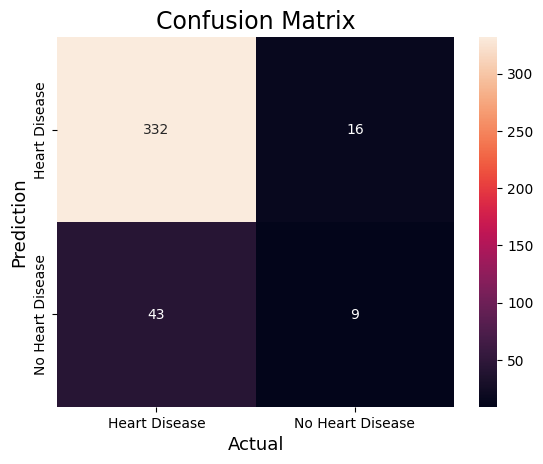

Random Forest: ROC AUC=0.719


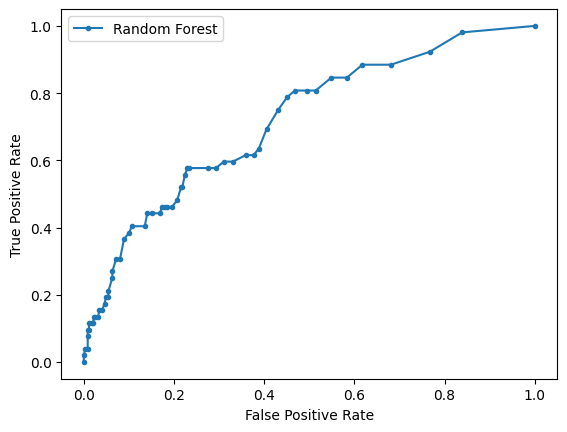

In [ ]:
rf = RandomForestClassifier() 
rf.fit(X_train_res, y_train_res.ravel()) 
predictions = rf.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 




rf_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", rf_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()






from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
rf_probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

**KNearestNeighbors**

Accuracy  0.7775
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       348
           1       0.29      0.48      0.36        52

    accuracy                           0.78       400
   macro avg       0.60      0.65      0.61       400
weighted avg       0.83      0.78      0.80       400

Accuracy   : 0.7775
Precision : 0.28735632183908044
Recall    : 0.4807692307692308
F1-score  : 0.3597122302158273


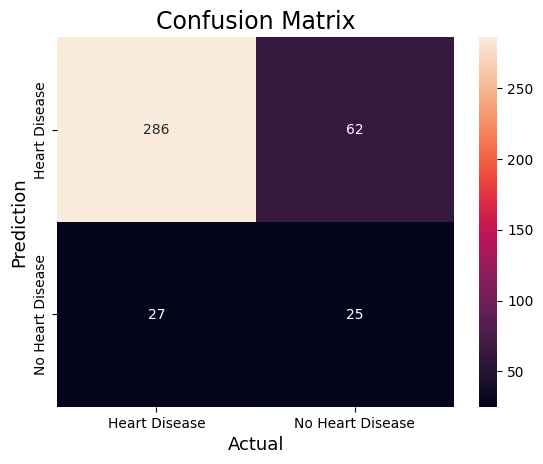

KNN: ROC AUC=0.659


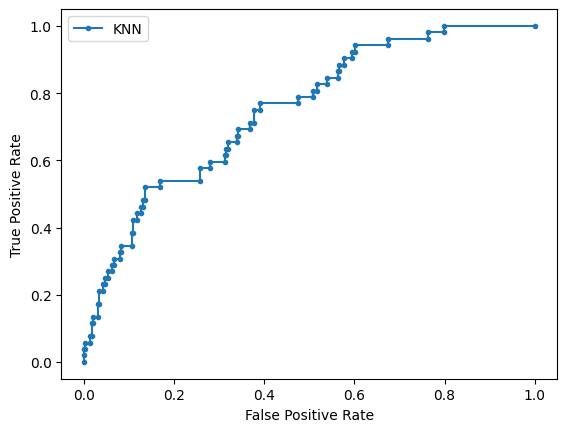

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_res, y_train_res.ravel()) 
predictions = knn.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 



kn_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", kn_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
kn_probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
kn_probs = kn_probs[:, 1]
kn_auc = roc_auc_score(y_test, kn_probs)
print('KNN: ROC AUC=%.3f' % (kn_auc))
kn_fpr, kn_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(kn_fpr, kn_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot







**DecisionTree**

Accuracy  0.8
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       348
           1       0.23      0.23      0.23        52

    accuracy                           0.80       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.80      0.80      0.80       400

Accuracy   : 0.8
Precision : 0.23076923076923078
Recall    : 0.23076923076923078
F1-score  : 0.23076923076923078


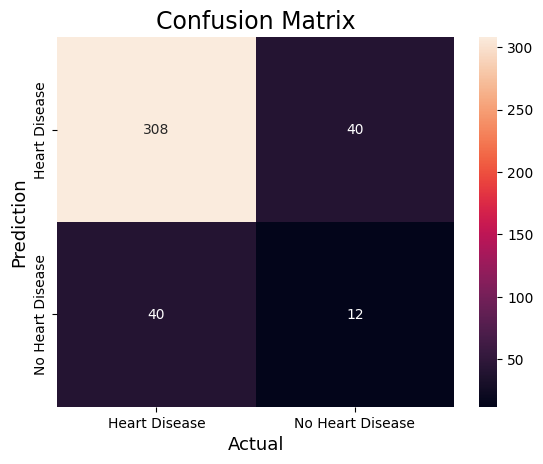

Decision Tree: ROC AUC=0.558


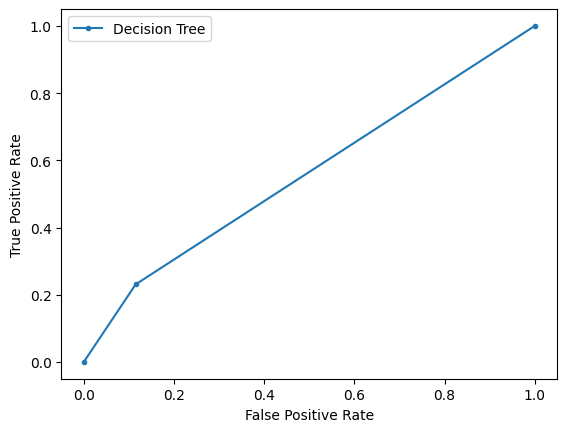

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res.ravel()) 
predictions = dt.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 




dt_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", dt_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
dt_probs = dt.predict_proba(x_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

**SVM**

Accuracy  0.81
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       348
           1       0.35      0.52      0.42        52

    accuracy                           0.81       400
   macro avg       0.63      0.69      0.65       400
weighted avg       0.85      0.81      0.83       400

Accuracy   : 0.81
Precision : 0.34615384615384615
Recall    : 0.5192307692307693
F1-score  : 0.41538461538461535


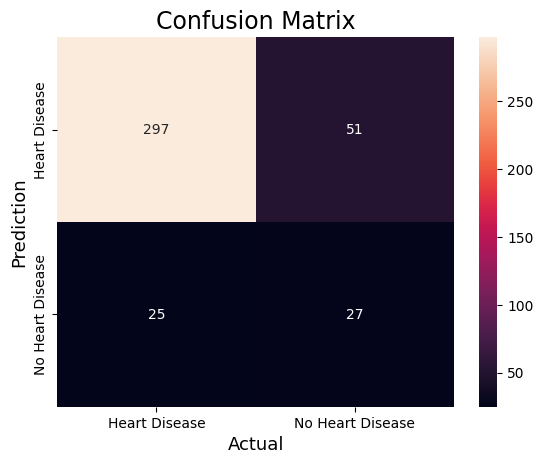

SVM: ROC AUC=0.558


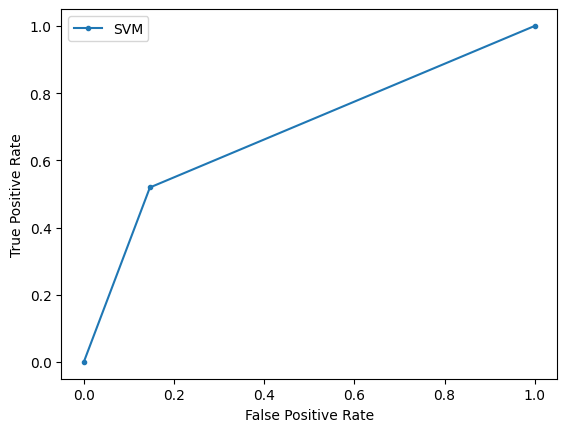

In [ ]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train_res, y_train_res.ravel()) 
predictions = sv.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 



svm_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", svm_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


sv_auc = roc_auc_score(y_test, predictions)
print('SVM: ROC AUC=%.3f' % (dt_auc))


sv_fpr, sv_tpr, _ = roc_curve(y_test, predictions)
pyplot.plot(sv_fpr, sv_tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot



**Naive Bayes**

Accuracy  0.6775
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       348
           1       0.23      0.65      0.35        52

    accuracy                           0.68       400
   macro avg       0.58      0.67      0.57       400
weighted avg       0.84      0.68      0.73       400

Accuracy   : 0.6775
Precision : 0.23448275862068965
Recall    : 0.6538461538461539
F1-score  : 0.34517766497461927


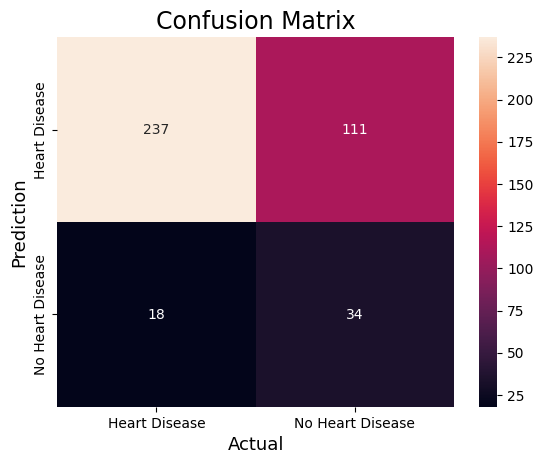

Naive Bayes: ROC AUC=0.726


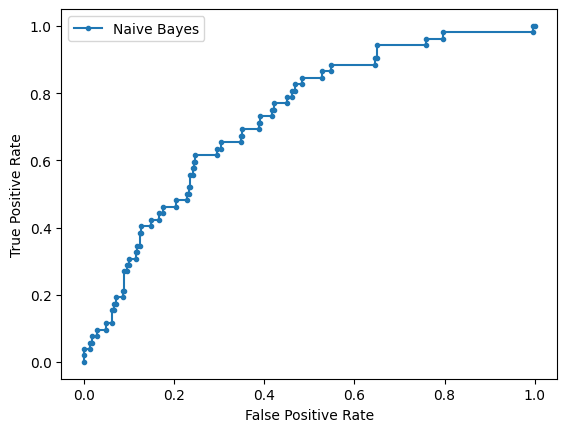

In [ ]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res.ravel()) 
predictions = nb.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 



nb_accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", nb_accuracy)
precision = precision_score(y_test,predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()






from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
nv_probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
nv_probs = nv_probs[:, 1]
nv_auc = roc_auc_score(y_test, nv_probs)
print('Naive Bayes: ROC AUC=%.3f' % (nv_auc))
nv_fpr, nv_tpr, _ = roc_curve(y_test, nv_probs)
pyplot.plot(nv_fpr, nv_tpr, marker='.', label='Naive Bayes')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

In [ ]:
scores = [lr_accuracy,rf_accuracy,kn_accuracy, svm_accuracy,dt_accuracy, nb_accuracy]
algorithms = ["Logistic Regression","Naive Bayes","Random Classifier","Decision Tree", "KNN", "SVM"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.81 %
The accuracy score achieved using Naive Bayes is: 0.8525 %
The accuracy score achieved using Random Classifier is: 0.7775 %
The accuracy score achieved using Decision Tree is: 0.81 %
The accuracy score achieved using KNN is: 0.8 %
The accuracy score achieved using SVM is: 0.6775 %
